In [1]:
#Loading libraries
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df =pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print ('The data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The data has 10683 rows and 11 columns


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Handling missing values
df.dropna(inplace=True)

In [8]:

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
for features in ['Airline','Source','Destination','Additional_Info','Total_Stops']:
    print('{} column has unique values ={}'.format(features,set(df[features].unique())))

Airline column has unique values ={'Trujet', 'Multiple carriers', 'Vistara Premium economy', 'Multiple carriers Premium economy', 'Jet Airways Business', 'SpiceJet', 'GoAir', 'IndiGo', 'Air Asia', 'Vistara', 'Jet Airways', 'Air India'}
Source column has unique values ={'Chennai', 'Mumbai', 'Banglore', 'Delhi', 'Kolkata'}
Destination column has unique values ={'Banglore', 'Delhi', 'Kolkata', 'Hyderabad', 'New Delhi', 'Cochin'}
Additional_Info column has unique values ={'No check-in baggage included', 'Business class', 'Red-eye flight', '1 Long layover', 'Change airports', '1 Short layover', 'No Info', '2 Long layover', 'In-flight meal not included', 'No info'}
Total_Stops column has unique values ={'4 stops', '3 stops', '2 stops', 'non-stop', '1 stop'}


In [10]:
# Converting Date_of_Journey to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Converting datetime to UNIX timestamp in seconds (int64)
df['Date_of_Journey'] = df['Date_of_Journey'].astype('int64') // 10**9

# Extracting day and month separately
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], unit='s').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], unit='s').dt.month

# Example output
df[['Date_of_Journey', 'Journey_Day', 'Journey_Month']].head()

,Date_of_Journey,Journey_Day,Journey_Month
0,1553385600,24,3
1,1556668800,1,5
2,1560038400,9,6
3,1557619200,12,5
4,1551398400,1,3


In [11]:
# Extracting hours and minutes from Dep_Time and Arrival_Time
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'].str.split(' ').str[0]).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time'].str.split(' ').str[0]).dt.minute

In [12]:
# Converting Duration to total minutes
def convert_duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0])
    return hours * 60 + minutes

In [13]:
df['Duration_Minutes'] = df['Duration'].apply(convert_duration_to_minutes)

In [14]:
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}


In [15]:
df['Total_Stops'] = df['Total_Stops'].map(stops_mapping)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date_of_Journey   10682 non-null  int64 
 2   Source            10682 non-null  object
 3   Destination       10682 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10682 non-null  object
 6   Arrival_Time      10682 non-null  object
 7   Duration          10682 non-null  object
 8   Total_Stops       10682 non-null  int64 
 9   Additional_Info   10682 non-null  object
 10  Price             10682 non-null  int64 
 11  Journey_Day       10682 non-null  int32 
 12  Journey_Month     10682 non-null  int32 
 13  Dep_Hour          10682 non-null  int32 
 14  Dep_Minute        10682 non-null  int32 
 15  Arrival_Hour      10682 non-null  int32 
 16  Arrival_Minute    10682 non-null  int32 
 17  Duration_Minutes 

In [17]:
df=df.drop(columns=['Route','Dep_Time','Arrival_Time', 'Duration'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,1553385600,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170
1,Air India,1556668800,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,1560038400,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,1557619200,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,1551398400,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285


In [18]:
df_copy = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Function to encode and return mapping
def encode_column(column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return {index: value for index, value in enumerate(le.classes_)}

In [21]:
# Encode columns and store mappings
mappings = {}
columns_to_encode = ['Airline', 'Source', 'Destination', 'Additional_Info']

for column in columns_to_encode:
    mappings[column] = encode_column(column)

In [22]:
df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,3,1553385600,0,5,0,8,3897,24,3,22,20,1,10,170
1,1,1556668800,3,0,2,8,7662,1,5,5,50,13,15,445
2,4,1560038400,2,1,2,8,13882,9,6,9,25,4,25,1140
3,3,1557619200,3,0,1,8,6218,12,5,18,5,23,30,325
4,3,1551398400,0,5,1,8,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,1554768000,3,0,0,8,4107,9,4,19,55,22,25,150
10679,1,1556323200,3,0,0,8,4145,27,4,20,45,23,20,155
10680,4,1556323200,0,2,0,8,7229,27,4,8,20,11,20,180
10681,10,1551398400,0,5,0,8,12648,1,3,11,30,14,10,160


In [23]:
df_copy

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,1553385600,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170
1,Air India,1556668800,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,1560038400,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,1557619200,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,1551398400,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,1554768000,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,1556323200,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,1556323200,Banglore,Delhi,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,1551398400,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,10,160


In [24]:
# Print the mappings
print("\nMappings:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")


Mappings:
Airline: {0: 'Air Asia', 1: 'Air India', 2: 'GoAir', 3: 'IndiGo', 4: 'Jet Airways', 5: 'Jet Airways Business', 6: 'Multiple carriers', 7: 'Multiple carriers Premium economy', 8: 'SpiceJet', 9: 'Trujet', 10: 'Vistara', 11: 'Vistara Premium economy'}
Source: {0: 'Banglore', 1: 'Chennai', 2: 'Delhi', 3: 'Kolkata', 4: 'Mumbai'}
Destination: {0: 'Banglore', 1: 'Cochin', 2: 'Delhi', 3: 'Hyderabad', 4: 'Kolkata', 5: 'New Delhi'}
Additional_Info: {0: '1 Long layover', 1: '1 Short layover', 2: '2 Long layover', 3: 'Business class', 4: 'Change airports', 5: 'In-flight meal not included', 6: 'No Info', 7: 'No check-in baggage included', 8: 'No info', 9: 'Red-eye flight'}


In [25]:
# Importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style of the plots
sns.set(style="whitegrid")

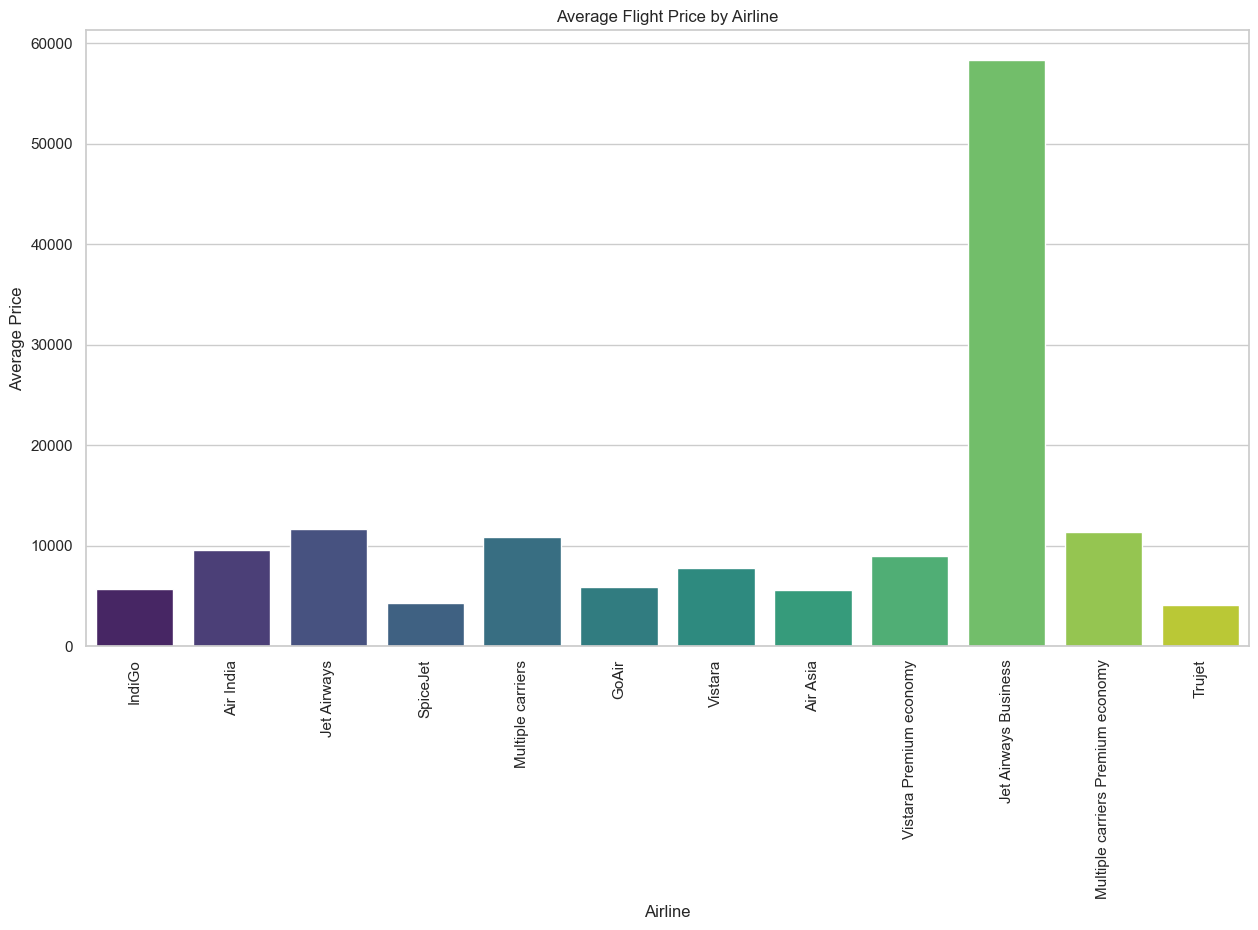

In [26]:
# 2. Average Price by Airline
plt.figure(figsize=(15, 8))
sns.barplot(x='Airline', y='Price', data=df_copy, ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

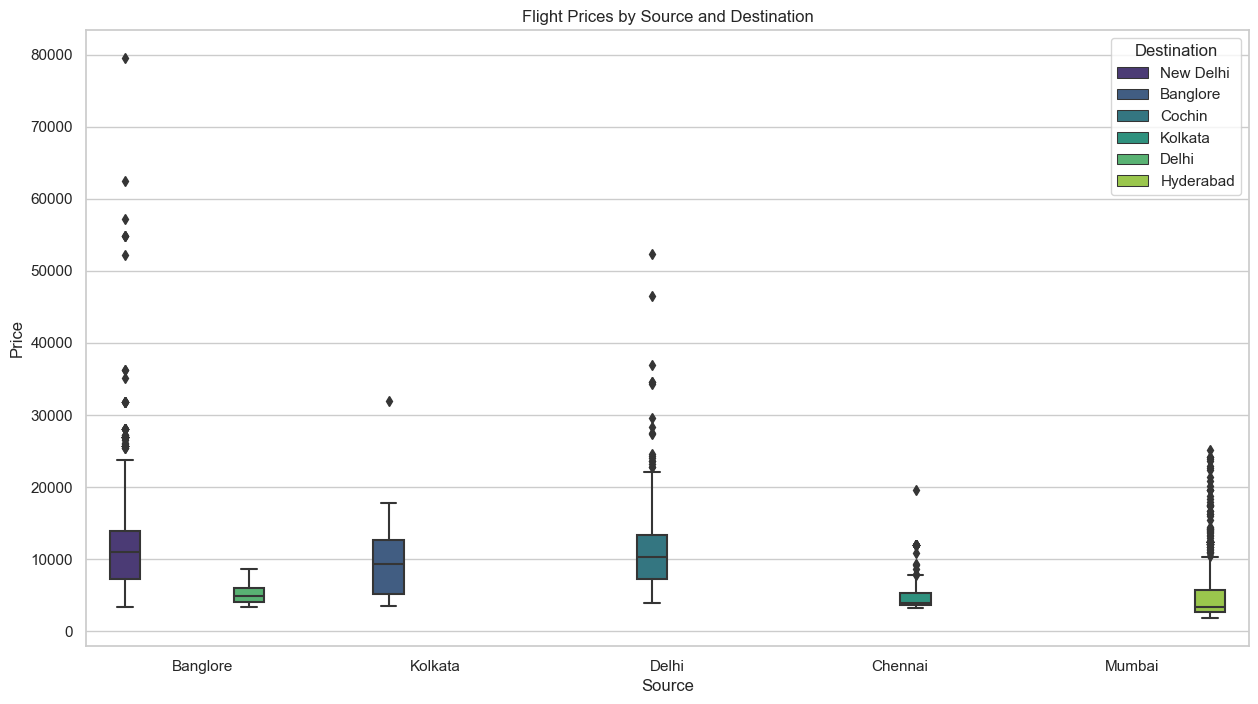

In [27]:
# 3. Flight Prices by Source and Destination
plt.figure(figsize=(15, 8))
sns.boxplot(x='Source', y='Price', hue='Destination', data=df_copy, palette='viridis')
plt.title('Flight Prices by Source and Destination')
plt.xlabel('Source')
plt.ylabel('Price')
plt.legend(title='Destination')
plt.show()

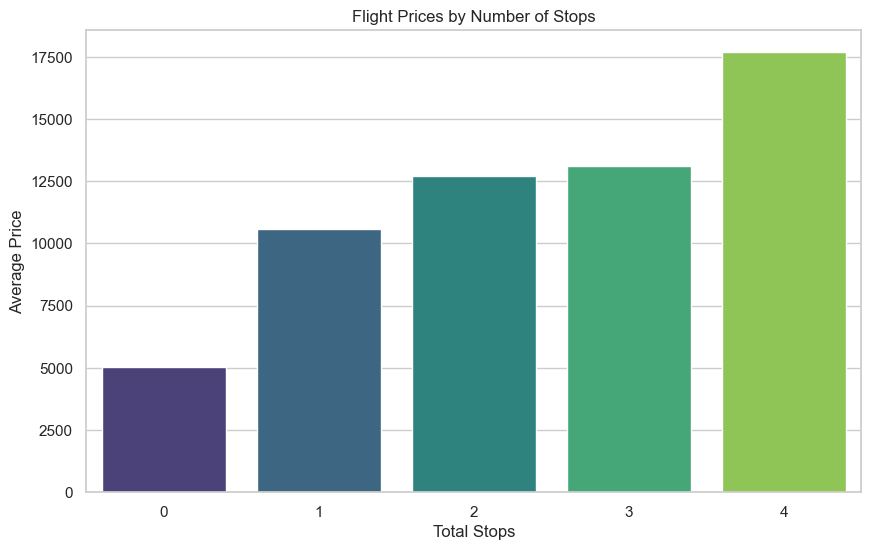

In [28]:
# 4. Total Stops vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Stops', y='Price', data=df, ci=None, palette='viridis')
plt.title('Flight Prices by Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

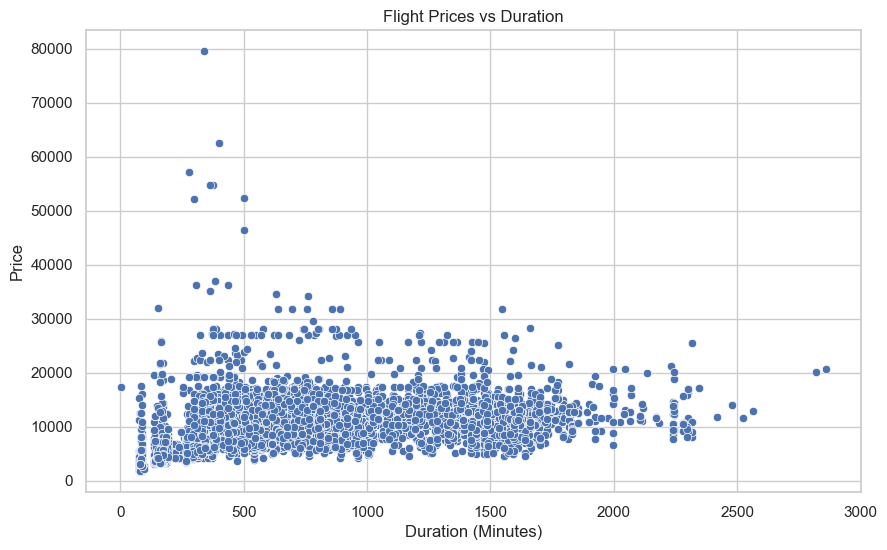

In [29]:
# 5. Prices vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Price', data=df)
plt.title('Flight Prices vs Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price')
plt.show()

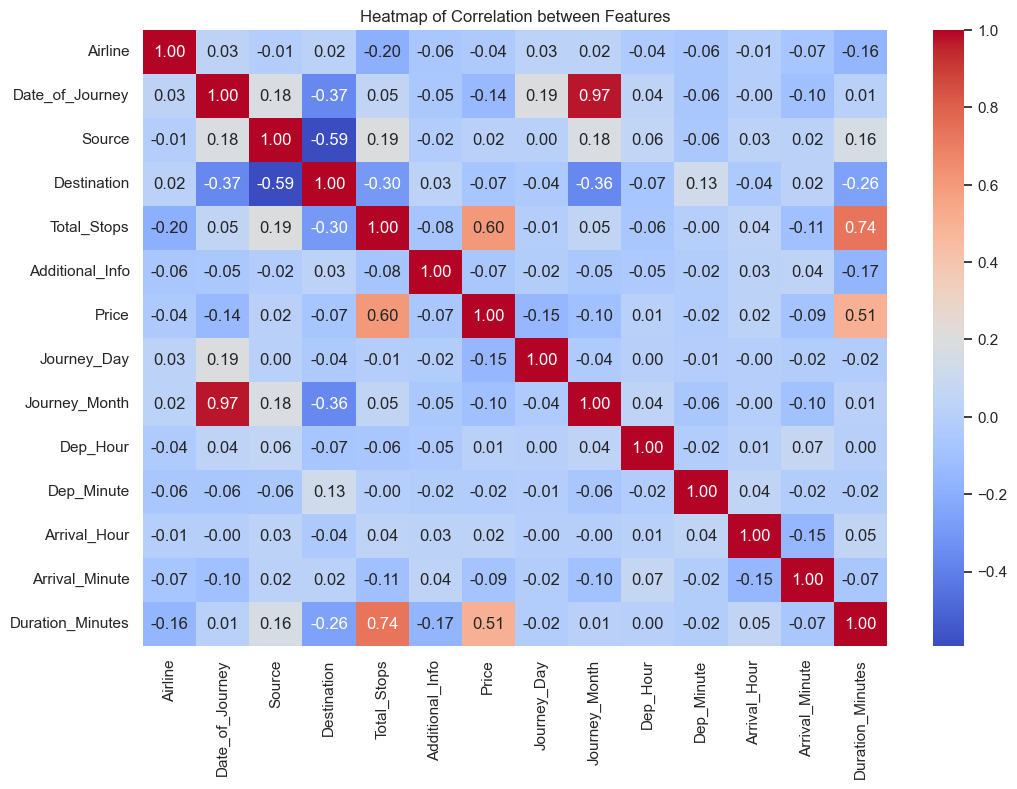

In [30]:
# 6. Heatmap of Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation between Features')
plt.show()

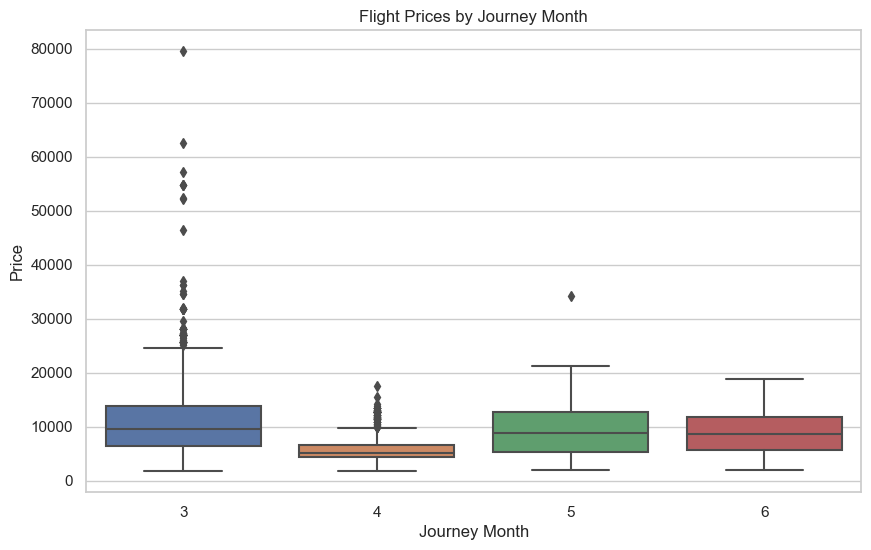

In [31]:
# 7. Price Distribution by Journey Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Journey_Month', y='Price', data=df)
plt.title('Flight Prices by Journey Month')
plt.xlabel('Journey Month')
plt.ylabel('Price')
plt.show()

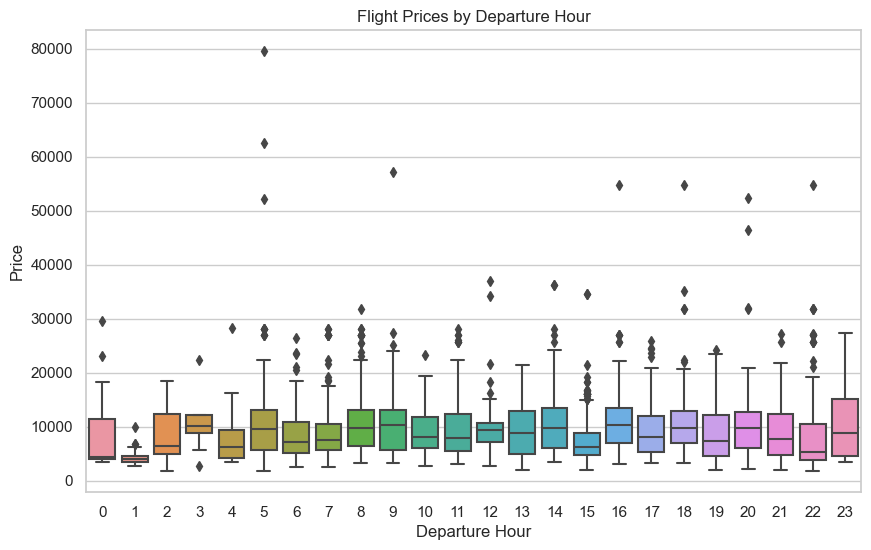

In [32]:
# 8. Price Distribution by Departure Hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dep_Hour', y='Price', data=df)
plt.title('Flight Prices by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Price')
plt.show()

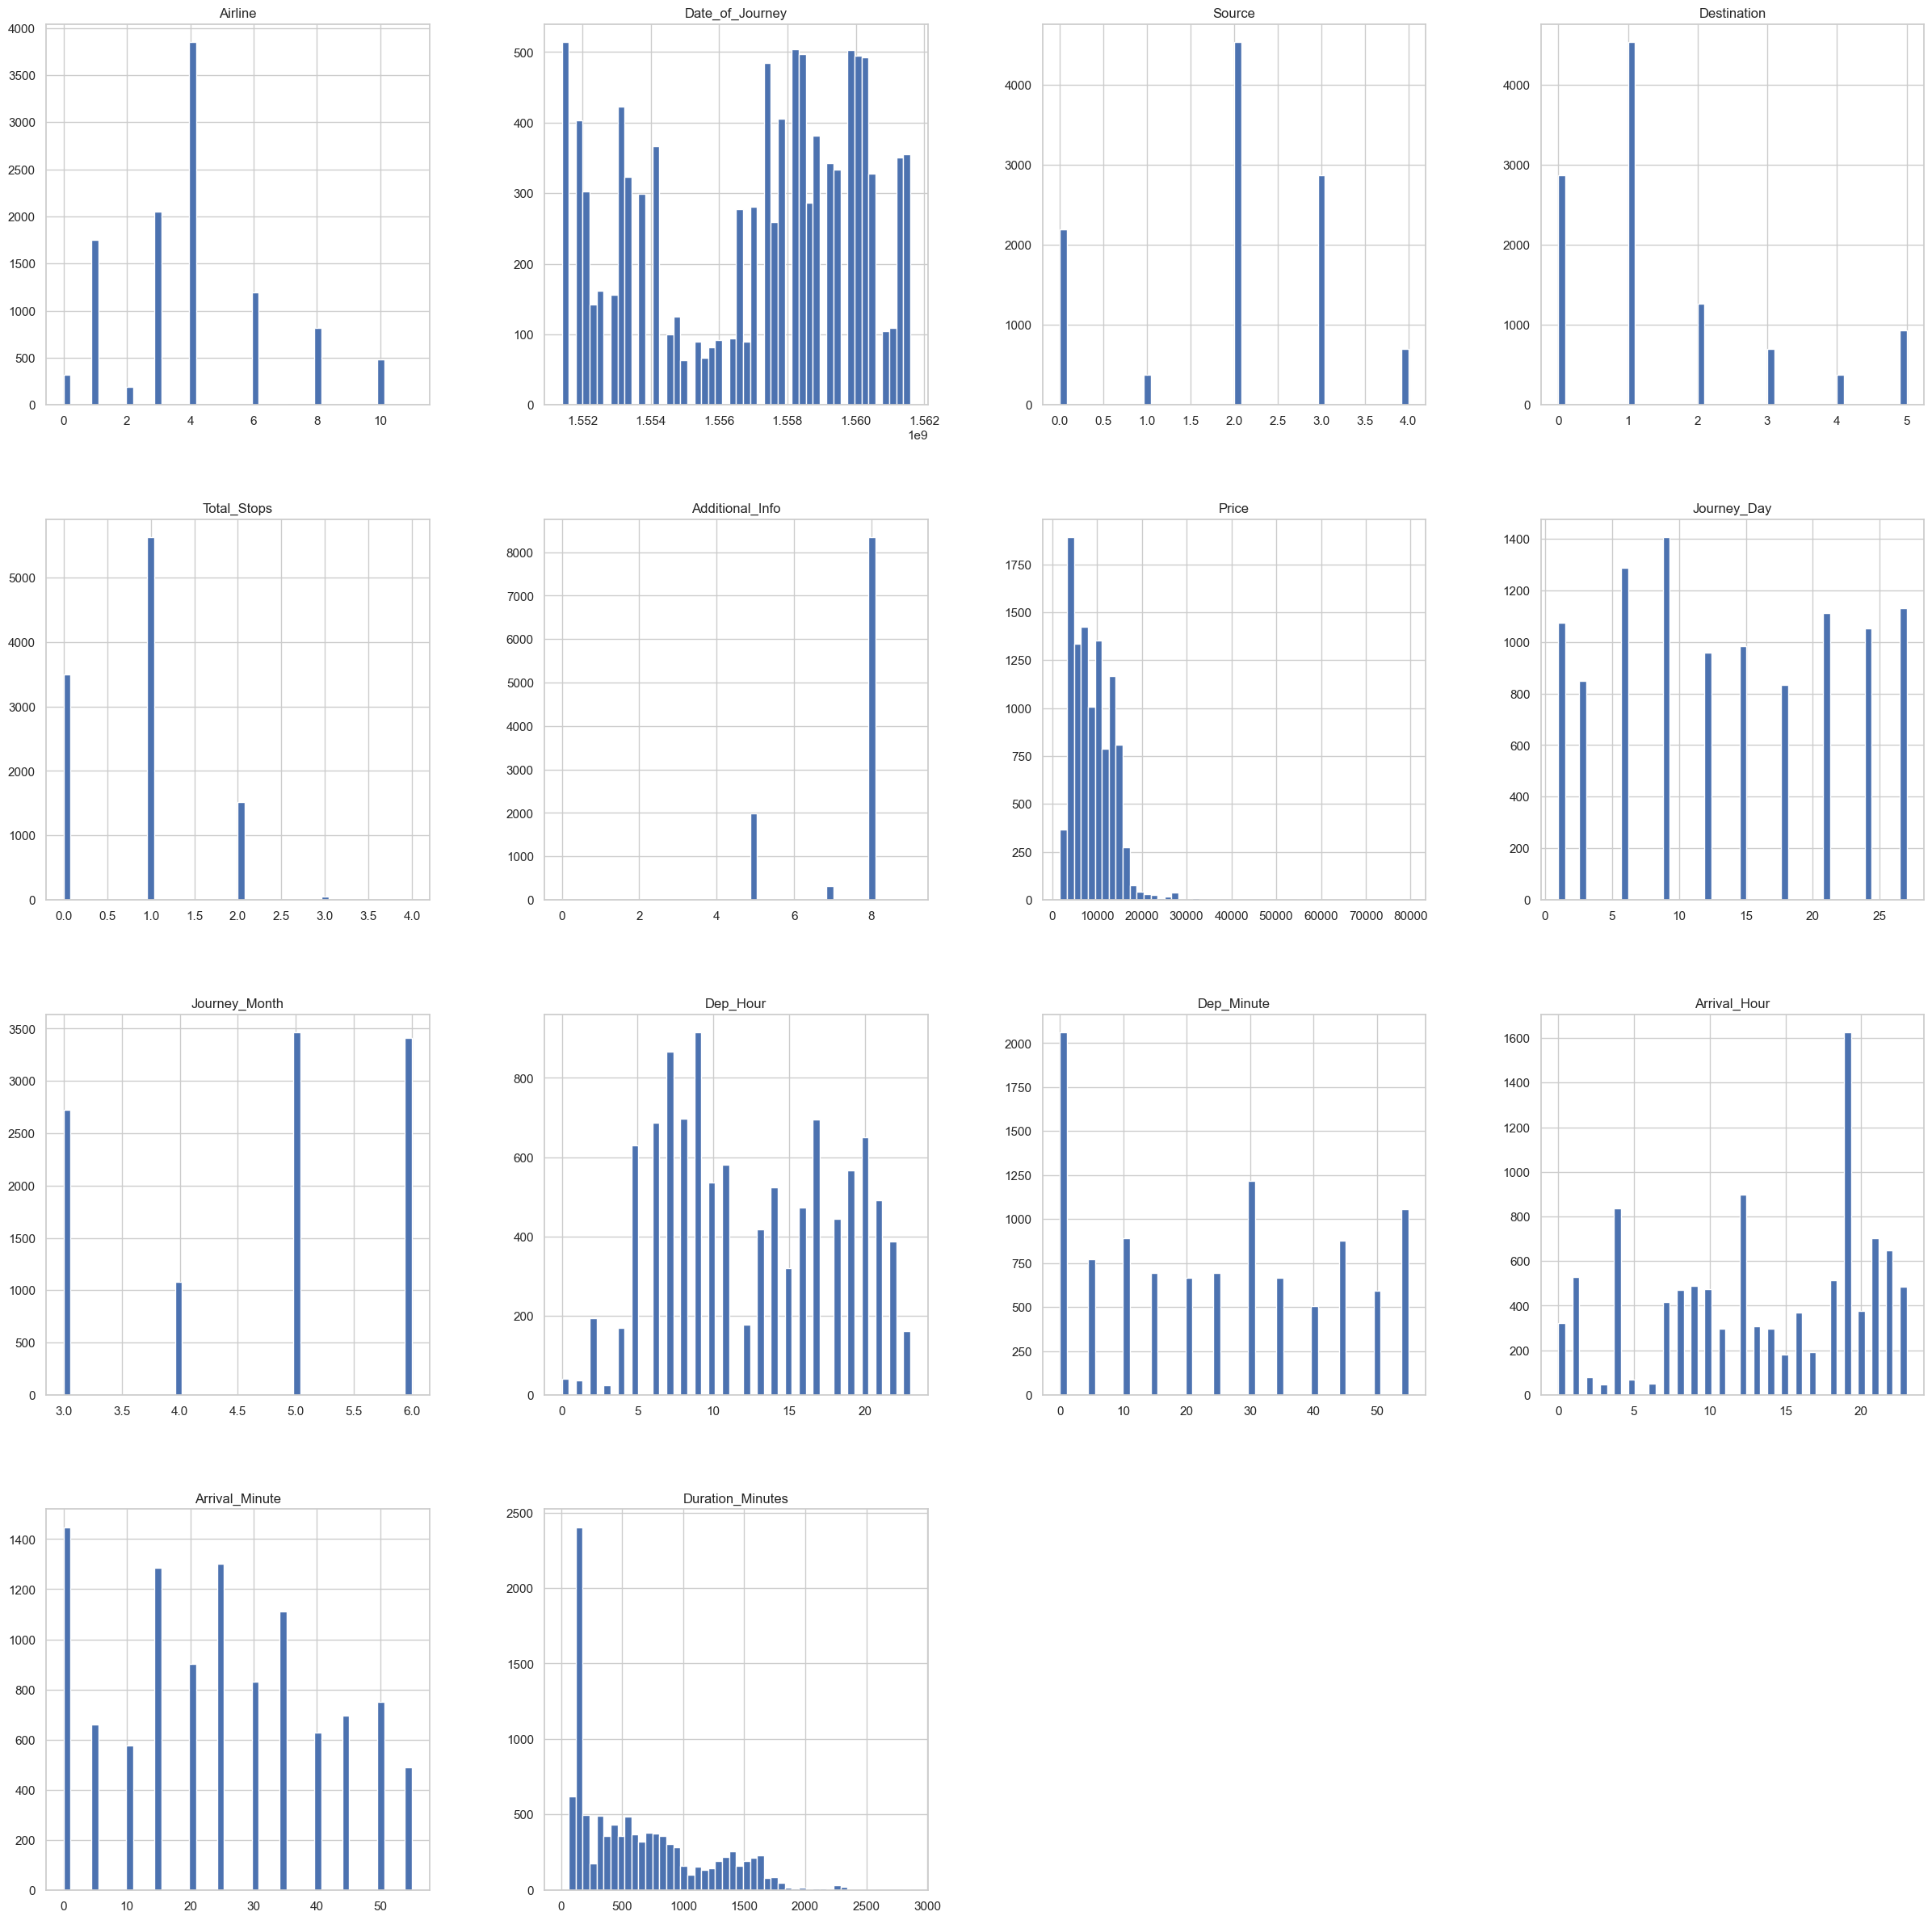

In [33]:
# Distribution in attributes
df.hist(bins=50, figsize=(30,30))
plt.show()

In [34]:
# Split the data into training and testing sets
X = df.drop(columns='Price')
y = df['Price']

In [35]:
X.shape, y.shape

((10682, 13), (10682,))

In [36]:
y = y.values.reshape(-1,1)

In [37]:
X.shape, y.shape

((10682, 13), (10682, 1))

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 13), (2137, 13), (8545, 1), (2137, 1))

In [42]:
preprocessor = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())

In [43]:
# Dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

In [44]:
# Training and evaluation loop
for model_name, model in models.items():
    # Pipeline creation including the model
    pipeline = make_pipeline(preprocessor, model)

    # Pipeline fitting to the training data
    pipeline.fit(X_train, y_train)

    # Evaluation of the pipeline on the test data
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing the mean squared error and r2 score
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - r2 score: {r2:.2f}')
    print("-------------------------------------------------------------------")

Linear Regression - Mean Squared Error: 11788533.05
Linear Regression - r2 score: 0.45
-------------------------------------------------------------------
Ridge Regression - Mean Squared Error: 12061519.38
Ridge Regression - r2 score: 0.44
-------------------------------------------------------------------
Lasso Regression - Mean Squared Error: 12110094.70
Lasso Regression - r2 score: 0.44
-------------------------------------------------------------------
Random Forest Regression - Mean Squared Error: 3089828.61
Random Forest Regression - r2 score: 0.86
-------------------------------------------------------------------
Gradient Boosting Regression - Mean Squared Error: 3501821.22
Gradient Boosting Regression - r2 score: 0.84
-------------------------------------------------------------------
KNeighborsRegressor - Mean Squared Error: 4053617.30
KNeighborsRegressor - r2 score: 0.81
-------------------------------------------------------------------
DecisionTreeRegressor - Mean Squared 

In [45]:
scaler = StandardScaler()
scaled_train_data=scaler.fit_transform(X_train)
scaled_test_data=scaler.transform(X_test)

In [46]:
#Evaluate models using cross-validation on training set
from sklearn.model_selection import cross_val_score

KNeighbor_scores = cross_val_score(KNeighborsRegressor(), scaled_train_data, y_train, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(RandomForestRegressor(), scaled_train_data, y_train, cv=5, scoring='neg_mean_squared_error')
gb_scores = cross_val_score(GradientBoostingRegressor(), scaled_train_data, y_train, cv=5, scoring='neg_mean_squared_error')

In [47]:
print(f"Linear Regression - RMSE: {np.sqrt(-KNeighbor_scores.mean()):.2f}")
print(f"Random Forest Regressor - RMSE: {np.sqrt(-rf_scores.mean()):.2f}")
print(f"Gradient Boosting Regressor - RMSE: {np.sqrt(-gb_scores.mean()):.2f}")

Linear Regression - RMSE: 2403.21
Random Forest Regressor - RMSE: 1797.78
Gradient Boosting Regressor - RMSE: 1989.87


In [48]:
# Fine-Tuning Gradient Boosting Model
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

grid_search.fit(scaled_train_data, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [50]:
# Retrieve the best parameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Gradient Boosting Regressor parameters: {best_params}")

Best Gradient Boosting Regressor parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [51]:
y_pred_best = best_model.predict(scaled_test_data)
best_rmse = mean_squared_error(y_test, y_pred_best, squared=False)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Best Gradient Boosting Regressor - RMSE: {best_rmse:.2f}, R²: {best_r2:.2f}")

Best Gradient Boosting Regressor - RMSE: 1579.72, R²: 0.88


In [52]:
import joblib

In [53]:
joblib.dump(best_model, 'FlightPrice_GBR.joblib')
joblib.dump(scaler, 'FlightPrice_scaler.joblib')

['FlightPrice_scaler.joblib']